In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("D:\Downloads\ANN Basic Dataset\Churn_Modelling.csv")

In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [21]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
## Feature Scalling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [50]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [55]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8659 - val_loss: 0.3387 - val_accuracy: 0.8556
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3195 - accuracy: 0.8653 - val_loss: 0.3383 - val_accuracy: 0.8544
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8656 - val_loss: 0.3388 - val_accuracy: 0.8537
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8664 - val_loss: 0.3389 - val_accuracy: 0.8556
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.8666 - val_loss: 0.3370 - val_accuracy: 0.8594
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3187 - accuracy: 0.8653 - val_loss: 0.3407 - val_accuracy: 0.8537
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8653 - val_loss: 0.3390 - val_accuracy: 0.8587

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8662 - val_loss: 0.3395 - val_accuracy: 0.8569
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8659 - val_loss: 0.3396 - val_accuracy: 0.8575
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8664 - val_loss: 0.3393 - val_accuracy: 0.8556
Epoch 61/100
200/200 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.8694 - val_loss: 0.3406 - val_accuracy: 0.8544
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8661 - val_loss: 0.3395 - val_accuracy: 0.8606
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8675 - val_loss: 0.3396 - val_accuracy: 0.8587
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8683 - val_loss: 0.3415 - val_accuracy:

In [56]:
import matplotlib.pyplot as plt

history.history

{'loss': [0.3197280764579773,
  0.31952759623527527,
  0.3194478154182434,
  0.320002019405365,
  0.3192870318889618,
  0.3187415599822998,
  0.3197200298309326,
  0.31915950775146484,
  0.3190520405769348,
  0.3190041482448578,
  0.3188234567642212,
  0.31928184628486633,
  0.31920796632766724,
  0.3191451132297516,
  0.31889086961746216,
  0.3189186155796051,
  0.3189212381839752,
  0.3182084560394287,
  0.3180924654006958,
  0.3189031183719635,
  0.317750483751297,
  0.31885066628456116,
  0.3185989558696747,
  0.3181447684764862,
  0.3182813227176666,
  0.31831103563308716,
  0.3182300925254822,
  0.3176259696483612,
  0.31777989864349365,
  0.318065345287323,
  0.31841525435447693,
  0.31812989711761475,
  0.31739699840545654,
  0.31775546073913574,
  0.3174489140510559,
  0.31749606132507324,
  0.3172958493232727,
  0.3171130120754242,
  0.3178239166736603,
  0.3173167109489441,
  0.3172914981842041,
  0.3163963556289673,
  0.31669434905052185,
  0.31764817237854004,
  0.31740966

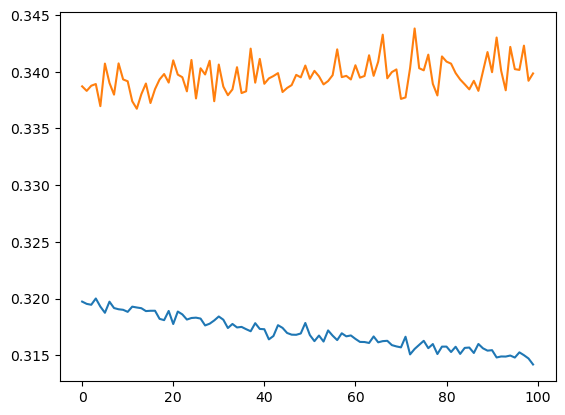

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

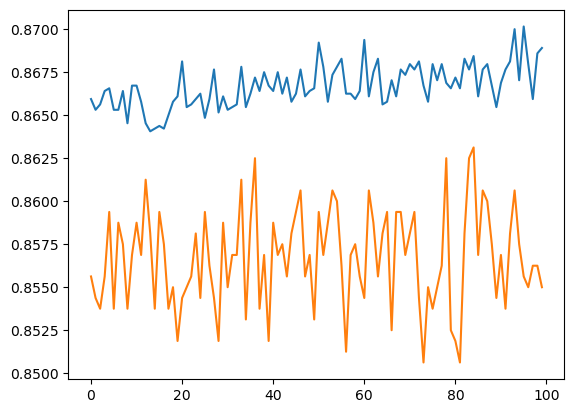

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [60]:
model.layers[0].get_weights()

[array([[ 0.0445991 ,  0.06448366,  0.13889821,  0.02660207,  0.05719145,
         -0.09442218,  0.0590486 ,  0.08177786, -0.21442156,  0.20871417,
         -0.15082398],
        [-0.83017987, -0.7122333 ,  0.02630522,  1.0407068 ,  0.00180506,
         -0.41063893,  0.53128064, -0.26081774, -0.06186994,  0.65590715,
          0.5434548 ],
        [ 0.006225  , -0.11979895, -0.6238857 , -0.42927745,  0.11507784,
          0.01335999,  0.12543792,  0.24835528, -0.05889901,  0.03096033,
          0.36943313],
        [ 0.01614487, -0.21957768,  0.46511504,  0.10891522,  0.2489399 ,
          1.1114455 , -0.11463134, -1.149868  , -0.1893002 ,  0.05893492,
         -0.4030502 ],
        [-0.02638202, -0.16262923, -0.49250227, -0.5967728 ,  1.2504301 ,
         -0.1278112 , -1.1501858 ,  0.1971379 , -1.3829603 , -0.38787723,
          0.04119103],
        [-0.08557319,  0.45643458,  0.47707272,  0.8265606 , -0.09806079,
         -0.4026888 , -0.0768124 , -0.15527584,  0.09309918, -0.2675590

In [61]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [62]:
y_pred = np.where(y_log>0.5,1,0)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625